# Reprocessing
## Kontrol
Model berdasarkan GCR Yongbyon, Korea Utara, dengan daya sesuai dengan target yaitu 200 MWe (Braun dkk., 2016). Dengan properti GCR pada umumnya, dimodelkan sebagai berikut.
1. Masukan: Pu 0.0816 kg/hari
2. Luaran: Pu 0.0816 kg/hari

In [51]:
# import modules
from sga import *

In [52]:
# uncertainty
sigma_sd    = 0.0005
sigma_so    = 0.05
sigma_r     = 0.05

# time
N           = 1000000
N_t         = 365
dt          = 1
t_cal       = 30

In [53]:
# MBA kontrol
# mass
mass    = 0.0816
# measurement
meas1_c = IKMP(mass + SQ_238PU/N_t, sigma_sd, sigma_so, sigma_r, t_cal)
meas2_c = IKMP(-mass, sigma_sd, sigma_so, sigma_r, t_cal)
# MBA
mba_c   = MBA([meas1_c, meas2_c])

Text(0, 0.5, 'MUF Pu (kg)')

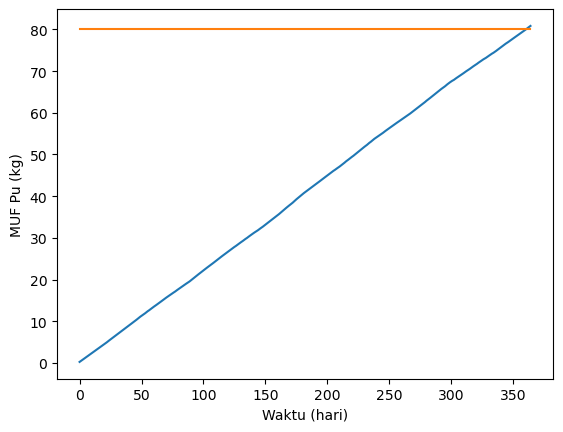

In [54]:
# MUF measurement
mba_c.reset()
MUFs_c  = MUF_over_t(mba_c, N_t)

# plot
fig, ax     = plt.subplots()
ax.plot(range(N_t), MUFs_c)
ax.plot(range(N_t), [SQ_238PU] * N_t)
ax.set_xlabel('Waktu (hari)')
ax.set_ylabel('MUF Pu (kg)')

## Pengukuran dua kali
Untuk kasus peletakan reaktor dan fasilitas pengolah bahan bakar berbeda negara, diperlukan pengukuran dari dua negara sehingga terdapat 3 kali pengukuran

In [55]:
# MBA skenario 1
# measurement
meas1_1 = IKMP(mass + SQ_238PU/N_t, sigma_sd, sigma_so, sigma_r, t_cal)
meas2_1 = IKMP(mass, sigma_sd, sigma_so, sigma_r, t_cal, type = 'storage')
meas3_1 = IKMP(-mass, sigma_sd, sigma_so, sigma_r, t_cal)
# MBA
mba_1   = MBA([meas1_1, meas2_1, meas3_1])

Text(0, 0.5, 'MUF Pu (kg)')

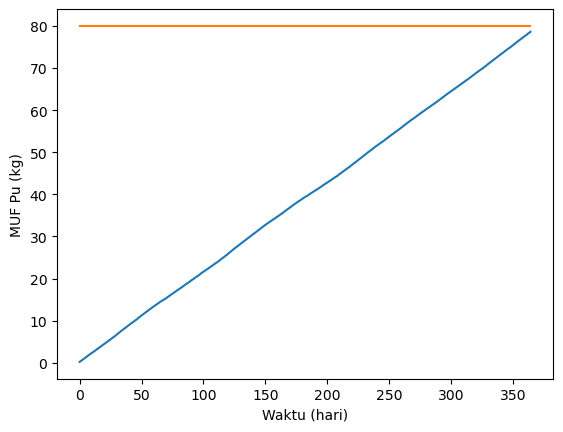

In [56]:
# MUF measurement
mba_1.reset()
MUFs_1  = MUF_over_t(mba_1, N_t)

# plot
fig, ax     = plt.subplots()
ax.plot(range(N_t), MUFs_1)
ax.plot(range(N_t), [SQ_238PU] * N_t)
ax.set_xlabel('Waktu (hari)')
ax.set_ylabel('MUF Pu (kg)')

In [57]:
ratio_c     = 1 - percent_of_detected(mba_c, N, N_t)
ratio_1     = 1 - percent_of_detected(mba_1, N, N_t)
print('kemungkinan error II dari kontrol \t', ratio_c)
print('kemungkinan error II dari skenario 1 \t', ratio_1)

kemungkinan error II dari kontrol 	 0.0011940000000000284
kemungkinan error II dari skenario 1 	 0.00170300000000001


Apabila pengukuran oleh masing-masing negara dianggap dalam MBA yang berbeda, maka hasilnya adalah sebagai berikut

In [58]:
# MBA skenario 2
# measurement
meas1_2a    = IKMP(mass + SQ_238PU/N_t, sigma_sd, sigma_so, sigma_r, t_cal)
meas2_2a    = IKMP(-mass, sigma_sd, sigma_so, sigma_r, t_cal)
meas1_2b    = IKMP(mass + SQ_238PU/N_t, sigma_sd, sigma_so, sigma_r, t_cal)
meas2_2b    = IKMP(mass, sigma_sd, sigma_so, sigma_r, t_cal, type = 'storage')
meas3_2c    = IKMP(-mass, sigma_sd, sigma_so, sigma_r, t_cal)
# MBA
mba_2a      = MBA([meas1_2a, meas2_2a])
mba_2b      = MBA([meas1_2b, meas2_2b, meas3_2c])

In [59]:
# perhitungan untuk modul 2
def percent_of_detected_2_MBA(mba1: MBA, mba2: MBA, N: int, N_t: int, dt: int = 1, sq: float = SQ_LEU):
    # counter
    detected    = 0
    # loop for N times
    for n in range(N):
        mba1.reset()
        mba2.reset()
        # measuring
        MUFs    = []
        for t in range(0, N_t, dt):
            mba1.measure(dt)
            mba2.measure(dt)
            MUFs.append(mba1.MUF + mba2.MUF)
            # cek apakah lebih dari SQ
            if MUFs[-1] >= sq:
                detected   += 1
                break
    
    # return
    ratio   = float(detected)/float(N)
    return(ratio)

ratio_2     = 1 - percent_of_detected_2_MBA(mba_2a, mba_2b, N, N_t)
print('kemungkinan error II dari skenario 2 \t', ratio_2)

kemungkinan error II dari skenario 2 	 0.0


In [60]:
print(meas1_2a.mass)
print(meas2_2a.mass)
print(SQ_238PU/N_t)

0.3007780821917808
-0.0816
0.2191780821917808
